In [ ]:
#thresholding

<b>Thresholding</b><br>
<br>
Thresholding is commonly used to simplify how an image is visualized by both the
computer and the user in order to make analysis easier. It is based on a value that the
user sets and every pixel is converted to white or black depending on whether the
value of every pixel is higher or lower than the set value. If the image is in grayscale, the
output image will be white and black, but if you choose to keep the RGB format for your
image, the threshold will be applied for every channel, which means it will still output a
colored image.

1.Simple Thresholding:<br> <br>If the pixel value is lower than the threshold set by the user,
this pixel will be assigned a 0 value (black), or 255 (white). There are also different styles of thresholding within simple thresholding:
<br>a).Threshold binary
<br>b).Threshold binary inverted
<br>c).Truncate
<br>d).Threshold to zero
<br>e).Threshold to zero inverted

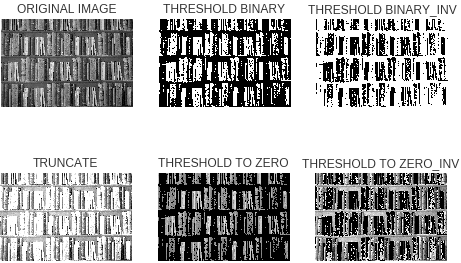

Threshold binary inverted works like binary but the pixels that were black
are white and vice versa. Global thresholding is another name given to binary
thresholding under simple thresholding.<br>
Truncate shows the exact value of the threshold if the pixel is above the threshold
and the pixel value.<br>
Threshold to zero outputs the pixel value (which is the actual value of the pixel) if
the pixel value is above the threshold value, otherwise it will output a black image,
whereas threshold to zero inverted does the exact opposite.<br>

<b>2.Adaptive Thresholding:</b> <br>
Simple thresholding uses a global value as the threshold.
If the image has different lighting conditions in some parts, the algorithm does
not perform that well. In such cases, adaptive thresholding automatically guesses
different threshold values for different regions within the image, giving us a better
overall result with varying lighting conditions.
There are two types of adaptive thresholding:<br><br>
a).Adaptive mean thresholding<br>
b).Adaptive Gaussian thresholding<br><br>
The difference between the adaptive thresholding and simple thresholding is
shown in below figure 

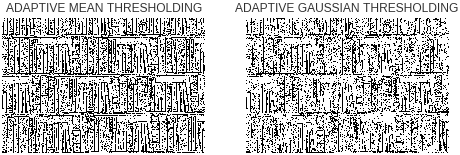

In adaptive mean thresholding, the threshold value is the mean of the
neighborhood area, while in adaptive Gaussian thresholding, the threshold value
is the weighted sum of the neighborhood values where weights are a Gaussian
window.

<b>3.Otsu's Binarization:</b><br> In global thresholding, we used an arbitrary value to assign
a threshold value. Consider a bimodal image (an image where the pixels are
distributed over two dominant regions). How would you choose the correct value?
Otsu's binarization automatically calculates a threshold value from the image
histogram for a bimodal image. An image histogram is a type of histogram that
acts as a graphical representation of the tonal distribution in a digital image:

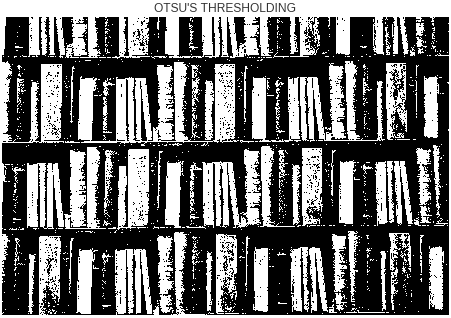

<br><b>Applying Various Thresholds to an Image</b>

Now you need to import the corresponding dependencies: OpenCV cv2 and
Matplotlib:

In [2]:
import cv2
from matplotlib import pyplot as plt

Now type the code to load the sample.png image, which we are going to process in
grayscale using OpenCV and show using Matplotlib:

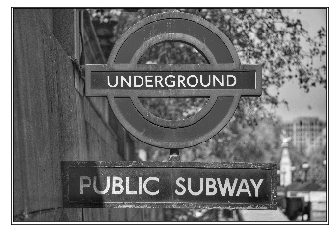

In [7]:
img = cv2.imread('sample.png',0)
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

Let's apply simple thresholding by using OpenCV methods.
The method for doing so in OpenCV is called cv2.threshold and it takes three
parameters: image (grayscale), threshold value (used to classify the pixel values),
and maxVal, which represents the value to be given if the pixel value is more than
(sometimes less than) the threshold value:

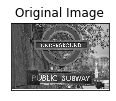

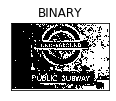

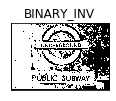

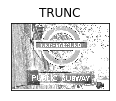

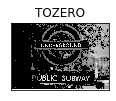

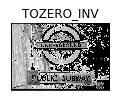

In [10]:

_,thresh1=cv2.threshold(img,107,255,cv2.THRESH_BINARY)
_,thresh2=cv2.threshold(img,107,255,cv2.THRESH_BINARY_INV)
_,thresh3=cv2.threshold(img,107,255,cv2.THRESH_TRUNC)
_,thresh4=cv2.threshold(img,107,255,cv2.THRESH_TOZERO)
_,thresh5=cv2.threshold(img,107,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY', 'BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

<br>We are going to do the same with adaptive thresholding.
The method for doing so is cv2.adaptiveThreshold and it has three special input
parameters and only one output argument. Adaptive method, block size (the
size of the neighborhood area), and C (a constant that is subtracted from the
mean or weighted mean calculated) are the inputs, whereas you only obtain the
thresholded image as the output. This is unlike global thresholding, where there
are two outputs:

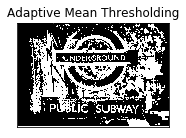

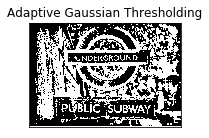

In [13]:
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,71,7)
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,71,7)
titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [th2, th3]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

<br>Otsu's binarization using OpenCV<br>
The method is the same as for simple thresholding, cv2.threshold, but with an
extra flag, cv2.THRESH_OTU:

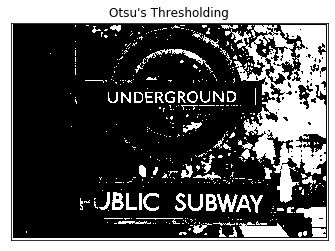

In [14]:
ret2,th=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
titles = ['Otsu\'s Thresholding']
images = [th]
for i in range(1):
    plt.subplot(1,1,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()